## Temporal Overview

**NB**: This notebook should be run after `create-temp-data.ipynb` if the full year of data needs to be analyzed.

The goal of this notebook is to aggregate the data according to categories on a temporal basis. I want to know how individual categories evolve over time. The data should also retain macro categories, to allow me to filter them depending on the news website section.

In [ ]:
%pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
full_year = pd.read_csv("../input-data/temp-data.json")

## What is the frequency of publication across the year?

This question is purely analytical, I am not interested in exporting data that show pure temporal frequency.

In [4]:
full_year.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'print_section', 'print_page', 'source', 'multimedia', 'headline',
       'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'subsection_name'],
      dtype='object')

In [5]:
full_year = full_year[["_id", "headline", "pub_date", "section_name", "subsection_name", "keywords"]]

In [6]:
full_year["pub_date"] = pd.to_datetime(full_year["pub_date"])

In [7]:
article_counts_by_date = full_year.groupby(full_year["pub_date"].dt.date).size()

In [8]:
article_counts_by_date = article_counts_by_date.reset_index(name="count")

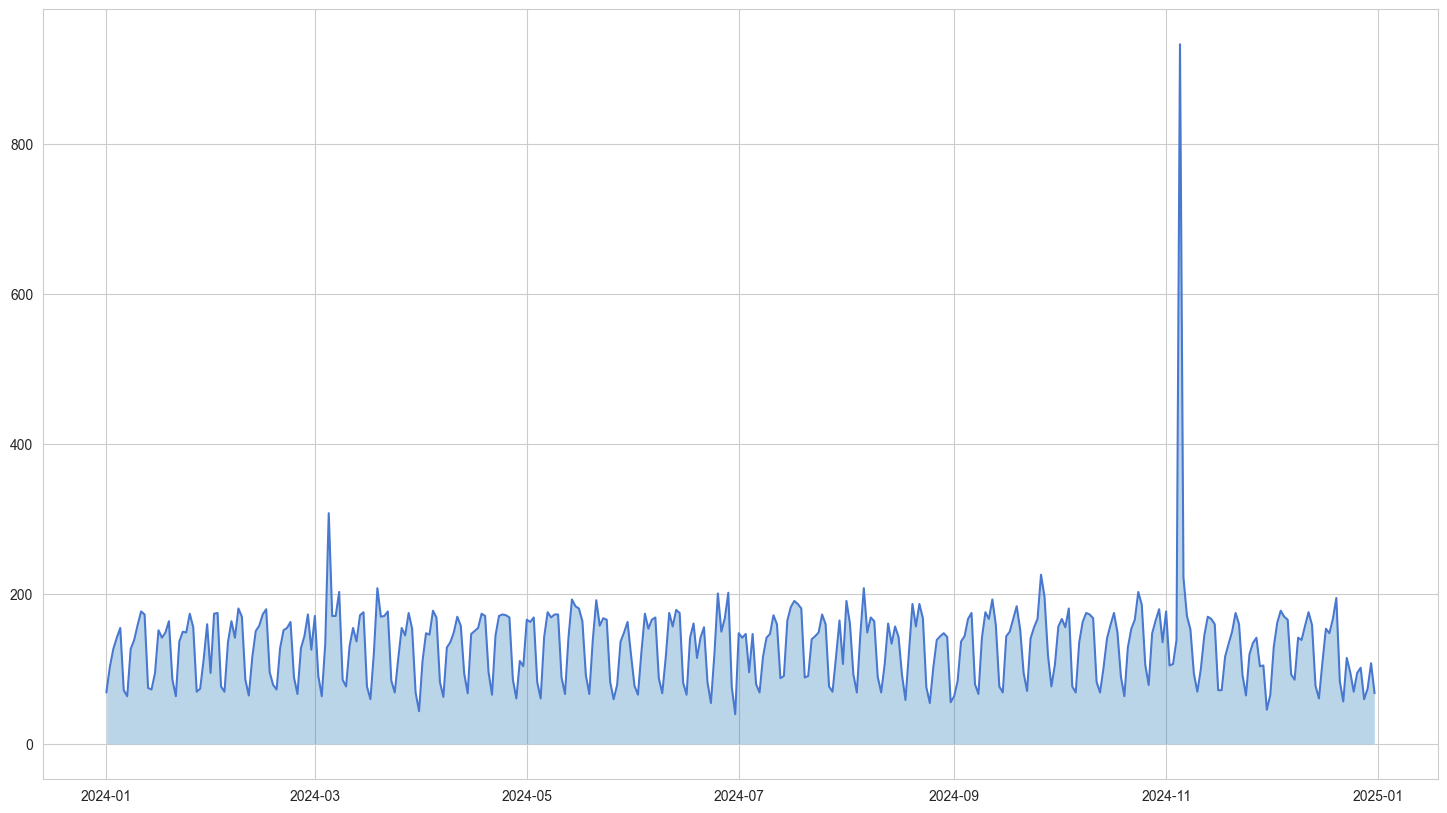

In [9]:
# Create data
x=article_counts_by_date["pub_date"]
y=article_counts_by_date["count"]

sns.set_style("whitegrid")
blue, = sns.color_palette("muted", 1)

# Area plot
# Make the plot
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(x, y, color=blue)
ax.fill_between(x, y, alpha=.3)

plt.show()


The behaviour is somewhat expected, as the news coverage follows a weekly patterns. For the current dataset (NYT), the outliers match [Super Tuesday](https://de.wikipedia.org/wiki/Super_Tuesday) and the [Presidential Elections of 2024](https://en.wikipedia.org/wiki/2024_United_States_presidential_election) respectively. 

## Overall frequency of individual categories

It would be more telling to know what individual categories are part of the coverage and how these categories develop individually throughout the year.

In [10]:
# Copy of the dataset
exploded_categories = full_year.copy()

In [12]:
# Converts the object-like string in keywords to a list
exploded_categories['keywords'] = exploded_categories['keywords'].apply(lambda x: [keyword['value'] for keyword in eval(x)])

In [13]:
exploded_categories.sample(2)

,_id,headline,pub_date,section_name,subsection_name,keywords
9109,nyt://article/2065a88f-2bfd-5f92-8d50-92f066d1...,{'main': 'How to Keep Your Own Soul Safe in th...,2024-12-09 10:02:35+00:00,Opinion,NaN,"[Butterflies and Moths, Biodiversity, Global W..."
16942,nyt://interactive/95da80d3-99bc-5f52-92c5-9673...,{'main': 'Alabama 4th Congressional District P...,2024-03-05 17:56:22+00:00,U.S.,Elections,"[Elections, Primaries and Caucuses, Elections,..."


In [14]:
# Explode the dataset along the keywords column
exploded_categories = exploded_categories.explode('keywords')

In [15]:
exploded_categories = exploded_categories.rename(columns={"keywords": "keyword"})

In [16]:
categories = exploded_categories.groupby(['keyword']).size().reset_index(name='count')
categories.sample(2)

,keyword,count
27614,"Spain, Samyia (d 2024)",1
7351,Dark Sky Company LLC,1


In [17]:
# Check how many sections are there
exploded_categories["section_name"].unique()

array(['Business Day', 'World', 'Corrections', 'Opinion',
       'Crosswords & Games', 'New York', 'Times Insider', 'Books',
       'Magazine', 'U.S.', 'Arts', 'Style', 'Briefing', 'Travel', 'Food',
       'Health', 'Movies', 'Podcasts', 'Well', 'Real Estate',
       'T Magazine', 'Climate', 'Weather', 'The Learning Network',
       'Technology', 'Theater', 'Science', 'The Upshot', 'Sports',
       'Your Money', 'Obituaries', 'Headway', 'International Home',
       'Video', 'Fashion & Style', nan, 'Smarter Living', 'T Brand',
       'Homepage', 'The New York Times Presents', 'Special Series',
       'Education', 'Admin', 'Automobiles', 'Reader Center',
       'Today’s Paper', 'Parenting', 'Multimedia/Photos', 'Lens'],
      dtype=object)

In [18]:
# Group the articles according to their individual keyword, section of the news outlet, and date of publication
categories_counts_by_date = exploded_categories.groupby([exploded_categories["keyword"], exploded_categories["section_name"], exploded_categories["pub_date"].dt.date]).size()

In [19]:
# Test: check what are the different keywords and how many entries they have in total
group_counts = categories_counts_by_date.groupby(level=0).size().sort_values(ascending=False)
print(group_counts)

keyword
Trump, Donald J                          1833
United States Politics and Government    1824
Presidential Election of 2024            1786
Content Type: Personal Profile           1663
Politics and Government                  1378
                                         ... 
Kent (England)                              1
Kensington (Calif)                          1
Kensington (Brooklyn, NY)                   1
Kenney, Seth                                1
Lehrer, Jim                                 1
Length: 33637, dtype: int64


In [20]:
# Test: select one keyword and check in how many different sections it appears
sub_groups_counts = categories_counts_by_date.loc["Presidential Election of 2024"].groupby(level=0).size()
sub_groups_counts.sort_values(ascending=False)

section_name
U.S.                    360
Opinion                 351
Business Day            190
Podcasts                150
The Upshot              110
New York                 97
Briefing                 77
World                    74
Climate                  72
Style                    66
Technology               60
Arts                     43
Magazine                 36
Books                    25
Times Insider            20
Health                   18
Headway                  12
Movies                    4
Well                      4
Science                   3
Food                      3
Real Estate               3
Video                     2
Weather                   2
Special Series            1
The Learning Network      1
Travel                    1
Fashion & Style           1
dtype: int64

In [21]:
# Reset index to remove the grouping, flat dataset
df_categories_count_per_day = categories_counts_by_date.reset_index(name="count")

In [22]:
df_categories_count_per_day.sample(5)

,keyword,section_name,pub_date,count
161271,OnStar Corp,Technology,2024-03-14,1
12612,Artificial Intelligence,Technology,2024-09-11,1
50658,Cooking and Cookbooks,Arts,2024-01-27,1
26098,Books and Literature,Books,2024-09-11,4
201965,Shutdowns (Institutional),Style,2024-08-27,1


In [23]:
df_categories_count_per_day.to_json('../data/categories-over-time.json', orient='records')

## Test: compare different categories over time

Again for analytical purposes, I want to see if comparing and/or showing indipendent categories bring forward different patterns compared to the yearly frequency of articles' publication.

In [ ]:
# I want to aggregated data on a monthly base to get rid of some unnecessary granularity
# Convert the dt entity into a string
df_categories_count_per_day["pub_month"] = pd.to_datetime(df_categories_count_per_day['pub_date'].astype(str))

In [ ]:
# Extract the month value from the date
df_categories_count_per_day["pub_month"] = df_categories_count_per_day.pub_month.dt.month

In [ ]:
# Group by publication month and category
categories_count_per_month = df_categories_count_per_day.groupby([df_categories_count_per_day["pub_month"], df_categories_count_per_day["keyword"]]).size()

In [51]:
df_categories_count_per_month = categories_count_per_month.reset_index(name="count")

In [ ]:
# Select the first group, the label has to be chosen manually. 
# Another interest example would be to use "Harris, Kamala D" to compare the volume of coverage about Harris with Trump.
selected_group = df_categories_count_per_month[df_categories_count_per_month["keyword"] == "Biden, Joseph R Jr"]
selected_group.sort_values(by=["pub_month"], inplace=True)

In [ ]:
# Select the second group
selected_group_two = df_categories_count_per_month[df_categories_count_per_month["keyword"] == "Trump, Donald J"]
selected_group_two.sort_values(by=["pub_month"], inplace=True)

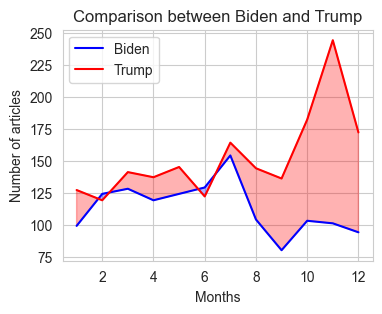

In [167]:
# Create the chart
x = selected_group["pub_month"].values
y = selected_group["count"].values
y_2 = selected_group_two["count"].values

# Area plot
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
ax.plot(x, y, color='blue', label="Biden")
ax.plot(x, y_2, color='red', label="Trump")


# Add a red fill between the two lines, if the second group > than the first.
ax.fill_between(
    x, y, y_2, where=(y_2 > y), 
    interpolate=True, color="red", alpha=0.3
)

# Add a blue fill between the two lines, if the second group <= than the first.
ax.fill_between(
    x, y, y_2, where=(y_2 <= y), 
    interpolate=True, color="blue", alpha=0.3
)

ax.set_title("Comparison between Biden and Trump")
plt.legend(loc="upper left")
plt.xlabel("Months")
plt.ylabel("Number of articles")
plt.show()